In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

C:\GRETECH\anaconda20\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
fake=pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true=pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.shape, true.shape

((23481, 4), (21417, 4))

# CLEANING AND PREPROCESSING DATA

In [5]:
fake['class']= '0'
true['class']='1'         # target sutunu elave etdik

In [6]:
fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
data=pd.concat([fake,true]).reset_index(drop=True)   #fake  true datlari birlesdirdik
data

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [9]:
from sklearn.utils import shuffle
data=shuffle(data)                       # DATA ni qarisiq etdi true fake ler qatisiq paylandi shuffle ile
data=data.reset_index(drop=True)
data.head()

,title,text,subject,date,class
0,"Forty human traffickers arrested, 500 people r...",PARIS (Reuters) - Forty people were arrested a...,worldnews,"November 23, 2017",1
1,WE’VE GOT THE LIST Of Bill and Hillary Clinton...,Bill and Hillary Clinton whored themselves out...,politics,"Mar 5, 2016",0
2,Trump Brags: Black People Are ‘Gonna Like Me ...,Donald Trump has an extremely messed up percep...,News,"January 25, 2016",0
3,House chairmen seek new federal probe of Clint...,WASHINGTON (Reuters) - The Republican chairmen...,politicsNews,"July 11, 2016",1
4,Obama visits a mosque to send pointed message ...,"CATONSVILLE, Md. (Reuters) - President Barack ...",politicsNews,"February 3, 2016",1


In [10]:
data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [11]:
data=data.drop(['title', 'subject' , 'date'], axis=1)

In [12]:
data # lazim olmayan sutunlari sildik

,text,class
0,PARIS (Reuters) - Forty people were arrested a...,1
1,Bill and Hillary Clinton whored themselves out...,0
2,Donald Trump has an extremely messed up percep...,0
3,WASHINGTON (Reuters) - The Republican chairmen...,1
4,"CATONSVILLE, Md. (Reuters) - President Barack ...",1
...,...,...
44893,WASHINGTON (Reuters) - By U.S. President Donal...,1
44894,With the Republican side of this presidential ...,0
44895,Although I disagree with Bill Maher that Donal...,0
44896,"If you believe this excuse, you ll believe any...",0


In [13]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [14]:
data.shape

(44898, 2)

In [15]:
import string 
#remove additional sign from string expressions
def punctuation_removal(text):
    text=text.lower()
    all_list = [char for char in text if char not in string.punctuation]
    clean_str=''.join(all_list)
    return clean_str

data['text']=data['text'].apply(punctuation_removal)     # datanin text columundan butun durgu isareleri silindi

In [16]:
data.head()

,text,class
0,paris reuters forty people were arrested and ...,1
1,bill and hillary clinton whored themselves out...,0
2,donald trump has an extremely messed up percep...,0
3,washington reuters the republican chairmen of...,1
4,catonsville md reuters president barack obama...,1


In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

<AxesSubplot:xlabel='class'>

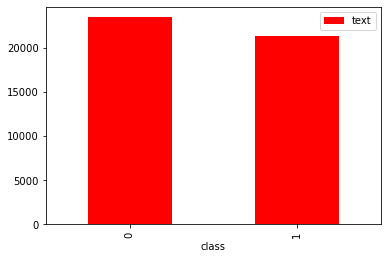

In [18]:
data.groupby(['class']).count().plot(kind='bar' , color='red')

# Wordcloud for fake news

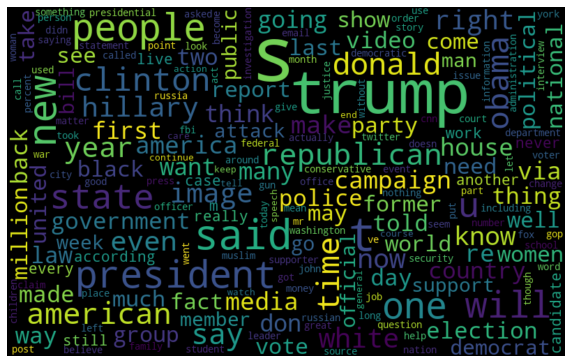

In [42]:
from wordcloud import WordCloud
# Sample text data
fake_data=data[data['class']=='0']
text=' '.join([text for text in fake_data.text])

# Create a WordCloud object with default settings
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud for real news 

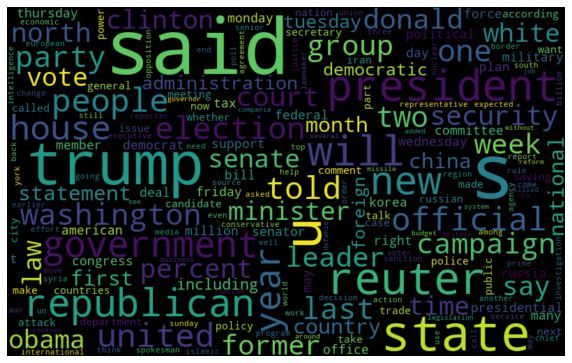

In [53]:
true_data=data[data['class']=='1']
true_text=' '.join([true_text for true_text in true_data.text])

wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(true_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
# Most frequent words counter   
import nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

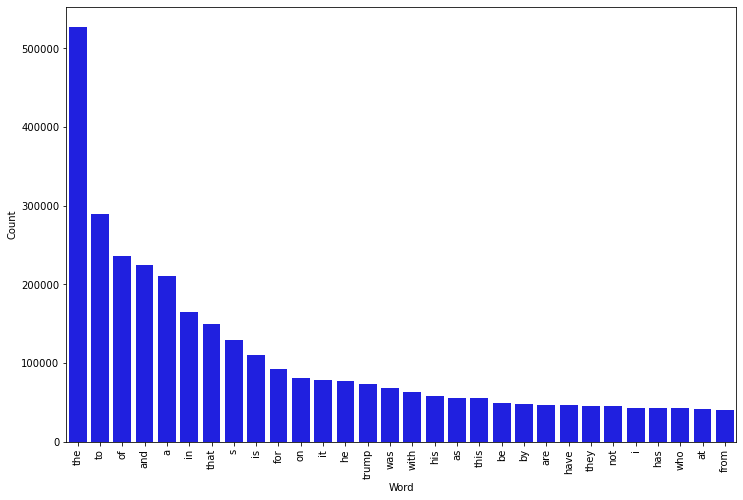

In [59]:
# Most frequent words in fake news
counter(data[data["class"] == "0"], "text",30)

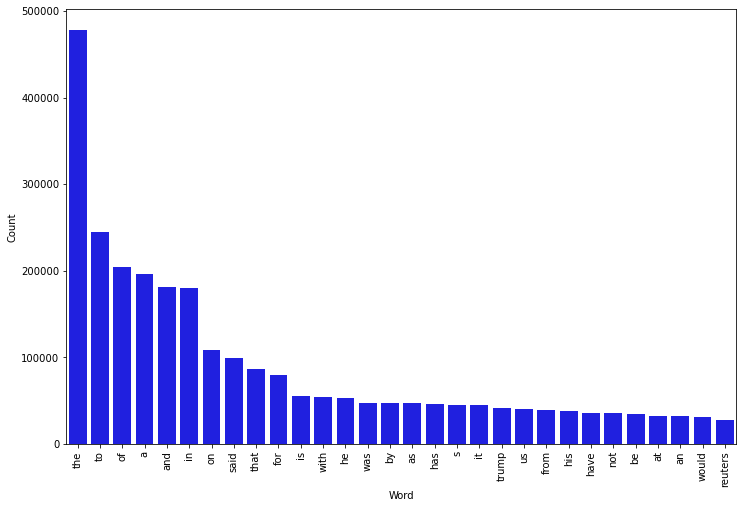

In [60]:
# Most frequent words in real news
counter(data[data["class"] == "1"], "text", 30)

# Create ml model for predict news

In [61]:
x=data['text']
y=data['class']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
xv_train=TfidfVectorizer().fit_transform(x_train)
xv_test=TfidfVectorizer().fit_transform(x_test)

# MACHINE LEARNING MODEL SELECTION

In [66]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', TfidfVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])


In [67]:
model = pipe.fit(x_train, y_train)
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction))

0.995456570155902


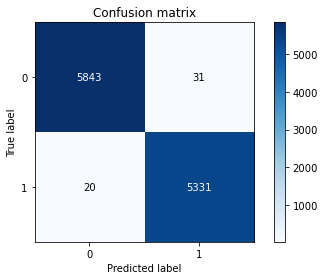

In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and prediction are already defined
cm = confusion_matrix(y_test, prediction)

# Function to plot confusion matrix with numbers inside the cells
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    # Add numbers inside the cells
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Call the plot_confusion_matrix function
plot_confusion_matrix(cm, classes=['0', '1'])
plt.show()

In [94]:
import pickle
# Save the model to a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)